In [2]:
import pandas as pd  
import numpy as np

loc_df = pd.read_csv("numeric_mat.csv", encoding='utf_8')
loc_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Finalc
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,2
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,2
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,5
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,2
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,3


<AxesSubplot:xlabel='Finalc', ylabel='G3'>

findfont: Font family ['FangSong'] not found. Falling back to DejaVu Sans.


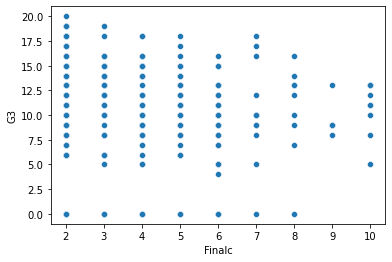

In [3]:
sub_loc_df = loc_df[["Finalc", "G3"]]
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font',family='FangSong')
sns.scatterplot(x="Finalc", y="G3", data=sub_loc_df)

In [4]:
from sklearn.preprocessing import StandardScaler
km_df = sub_loc_df
km_df_standardize = StandardScaler().fit_transform(km_df)
km_df_standardize = pd.DataFrame(data=km_df_standardize, columns=list(km_df.columns))
km_df_standardize.head()

,Finalc,G3
0,-0.894179,-0.964934
1,-0.894179,-0.964934
2,0.619538,-0.090739
3,-0.894179,1.002004
4,-0.389607,-0.090739


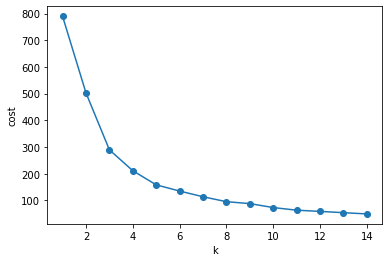

In [5]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
cost = []
K = range(1, 15)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=99)
    kmeanModel.fit(km_df_standardize)
    cost.append(kmeanModel.inertia_)

plt.xlabel('k')
plt.ylabel('cost')
plt.plot(K, cost, 'o-')
plt.show()

<AxesSubplot:xlabel='Finalc', ylabel='G3'>

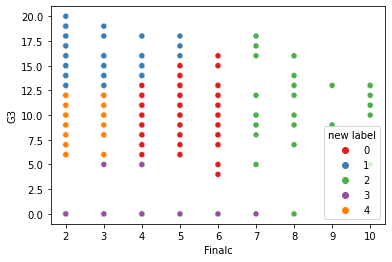

In [6]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5, random_state=99)
km.fit(km_df_standardize)
km_label = pd.DataFrame(km.labels_, columns=['new label'])
km_df = pd.concat([km_df, km_label],axis=1)
plt.rcParams['axes.unicode_minus'] = False
sns.scatterplot(x="Finalc", y="G3", hue="new label", data=km_df, palette="Set1")

In [7]:
final_df = km_df
final_df["absences"] = loc_df["absences"]
final_df["failures"] = loc_df["failures"]
final_df.head()

,Finalc,G3,new label,absences,failures
0,2,6,4,6,0
1,2,6,4,4,0
2,5,10,0,10,3
3,2,15,1,2,0
4,3,10,4,4,0


In [8]:
summary_df = \
final_df[["G3", "Finalc", "absences", "failures", "new label"]].groupby("new label") \
        .mean()\
        .round()
summary_df['count'] = \
    final_df \
    .groupby("new label") \
    .size()

summary_df

,G3,Finalc,absences,failures,count
new label,,,,,
0,10.0,5.0,7.0,0.0,108
1,15.0,3.0,5.0,0.0,105
2,11.0,8.0,8.0,0.0,38
3,0.0,3.0,1.0,1.0,40
4,10.0,2.0,7.0,0.0,104


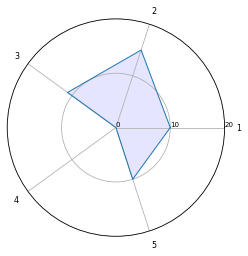

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

df = pd.DataFrame({
'group': ['G3','Finalc','absences','failures'],
'1': [10, 5, 7, 0],
'2': [15, 3, 5, 0],
'3': [11, 8, 8, 0],
'4': [0, 3, 1, 1],
'5': [10, 2, 7, 0]
})

categories=list(df)[1:]
N = len(categories)

values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

ax = plt.subplot(111, polar=True)

plt.xticks(angles[:-1], categories, color='black', size=8)

ax.set_rlabel_position(0)
plt.yticks([0,10,20], ["0","10","20"], color="black", size=7)
plt.ylim(0,20)

ax.plot(angles, values, linewidth=1, linestyle='solid')

ax.fill(angles, values, 'b', alpha=0.1)

plt.show()